In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:' , x_train.shape)
H=200#no of hidden layers
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train,x_test=x_train/255.0,x_test/255.0

mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)


170500096/170498071 [==============================] - 4s 0us/step
x_train: (50000, 32, 32, 3)


In [11]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense
from keras.optimizers import SGD
from keras.regularizers import l2

model = Sequential()
model.add(Conv2D(32, (3, 3),kernel_regularizer=l2(0.002),bias_regularizer=l2(0.002), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),kernel_regularizer=l2(0.002),bias_regularizer=l2(0.002), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),kernel_regularizer=l2(0.002),bias_regularizer=l2(0.002), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64,kernel_regularizer=l2(0.002),bias_regularizer=l2(0.002), activation='relu'))
model.add(Dense(10,kernel_regularizer=l2(0.002),bias_regularizer=l2(0.002), activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)              

In [12]:
sgd = SGD(lr=0.01, decay=1e-7, momentum=0.8)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
fitting=model.fit(x_train, y_train, batch_size=50, epochs=25,validation_data=(x_test, y_test))

Epoch 1/25
1000/1000 [==============================] - 67s 67ms/step - loss: 2.4521 - accuracy: 0.2595 - val_loss: 1.9252 - val_accuracy: 0.4297
Epoch 2/25
1000/1000 [==============================] - 67s 67ms/step - loss: 1.8070 - accuracy: 0.4775 - val_loss: 1.6374 - val_accuracy: 0.5296
Epoch 3/25
1000/1000 [==============================] - 73s 73ms/step - loss: 1.5950 - accuracy: 0.5399 - val_loss: 1.5036 - val_accuracy: 0.5632
Epoch 4/25
1000/1000 [==============================] - 66s 66ms/step - loss: 1.4717 - accuracy: 0.5797 - val_loss: 1.4313 - val_accuracy: 0.5910
Epoch 5/25
1000/1000 [==============================] - 66s 66ms/step - loss: 1.3868 - accuracy: 0.6090 - val_loss: 1.3964 - val_accuracy: 0.6045
Epoch 6/25
1000/1000 [==============================] - 66s 66ms/step - loss: 1.3111 - accuracy: 0.6329 - val_loss: 1.3527 - val_accuracy: 0.6261
Epoch 7/25
1000/1000 [==============================] - 67s 67ms/step - loss: 1.2743 - accuracy: 0.6509 - val_loss: 1.2961 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


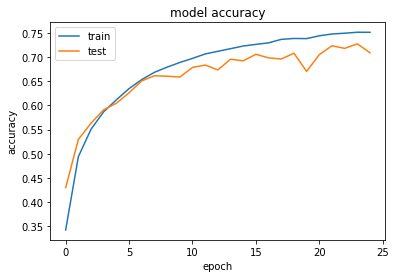

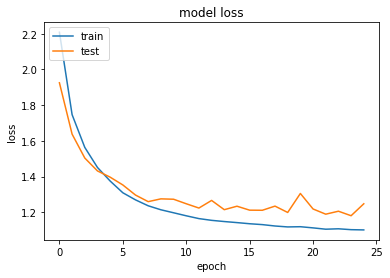

In [13]:
print(fitting.history.keys())
plt.plot(fitting.history['accuracy'])
plt.plot(fitting.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fitting.history['loss'])
plt.plot(fitting.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()